
Filtered Data (as per our discretion for better results)
> Averaged the input data.



Loading dataset...
Dataset loaded: 3650 records

Applying centered moving average filter (window=10 days: 4 past + current + 4 future)...
Original data points: 3650
After filtering: 3640 (lost 10 points at boundaries)

Preparing training data...


Building training set: 100%|██████████| 2911/2911 [00:00<00:00, 656043.14it/s]



Calculating model coefficients using normal equation...
Autoregressive Model (AR(1)) Results

Model Equation: T(t+1) = 0.9923 × T(t) + 0.0843

Coefficient (a): 0.9923
Intercept (b): 0.0843

Making predictions on test set...


Generating predictions: 100%|██████████| 728/728 [00:00<00:00, 347971.89it/s]


RMSE on Test Set: 0.363°C
Train/Test Split: 2912/728

Generating plot...


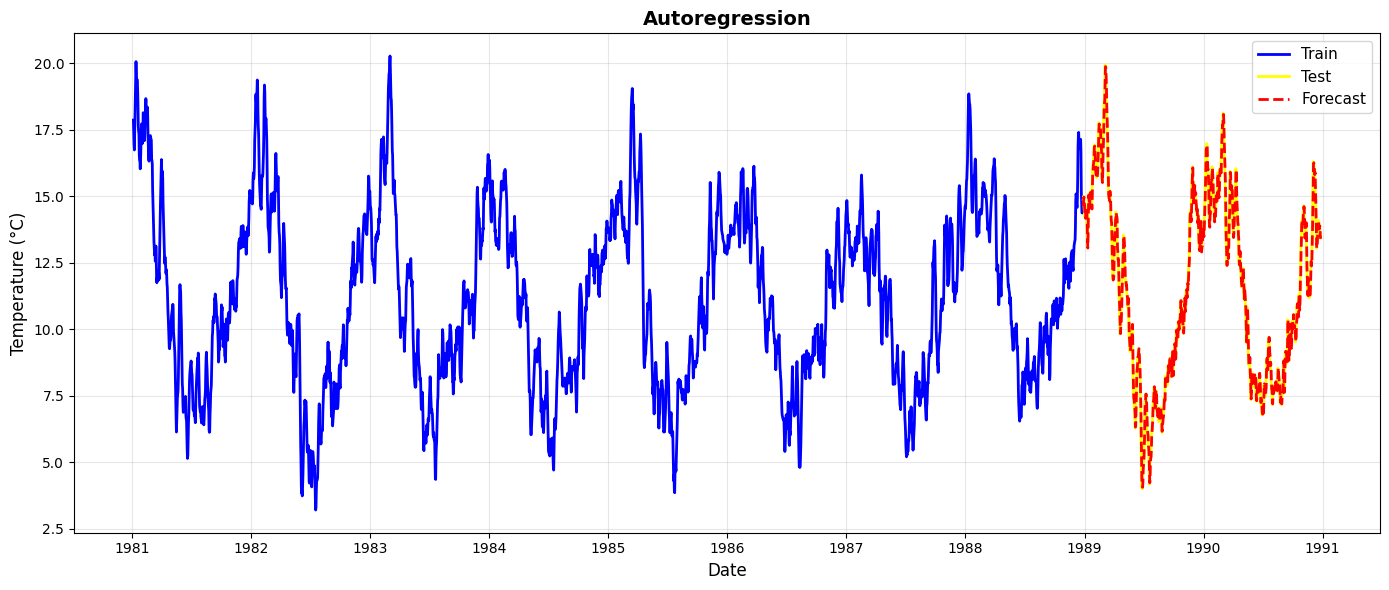


Plot generated successfully!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Load the dataset
print("Loading dataset...")
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url)
print(f"Dataset loaded: {len(df)} records")

# Extract temperature values and convert dates to datetime
temps_raw = df['Temp'].values
dates = pd.to_datetime(df['Date'])

# Preprocessing: Apply centered moving average filter to reduce noise
print("\nApplying centered moving average filter (window=10 days: 4 past + current + 4 future)...")
window_size = 10
half_window = window_size // 2

# Create centered moving average
temps = []
for i in range(half_window, len(temps_raw) - half_window):
    window_avg = np.mean(temps_raw[i - half_window:i + half_window])
    temps.append(window_avg)

temps = np.array(temps)
dates = dates[half_window:-half_window]  # Adjust dates to match filtered data length

print(f"Original data points: {len(temps_raw)}")
print(f"After filtering: {len(temps)} (lost {len(temps_raw) - len(temps)} points at boundaries)")

# Parameters
lag = 1  # AR(1) model
train_size = int(len(temps) * 0.8)

# Prepare training data
X_train = []
y_train = []

print("\nPreparing training data...")
for i in tqdm(range(lag, train_size), desc="Building training set"):
    X_train.append(temps[i - lag])
    y_train.append(temps[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Linear regression using normal equation (closed-form solution)
print("\nCalculating model coefficients using normal equation...")
n = len(X_train)
sum_x = np.sum(X_train)
sum_y = np.sum(y_train)
sum_xy = np.sum(X_train * y_train)
sum_x2 = np.sum(X_train ** 2)

# Calculate coefficients
a = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
b = (sum_y - a * sum_x) / n

print("=" * 50)
print("Autoregressive Model (AR(1)) Results")
print("=" * 50)
print(f"\nModel Equation: T(t+1) = {a:.4f} × T(t) + {b:.4f}")
print(f"\nCoefficient (a): {a:.4f}")
print(f"Intercept (b): {b:.4f}")

# Make predictions on test set
predictions = []
actuals = []

print("\nMaking predictions on test set...")
for i in tqdm(range(train_size, len(temps)), desc="Generating predictions"):
    pred = a * temps[i - lag] + b
    predictions.append(pred)
    actuals.append(temps[i])

predictions = np.array(predictions)
actuals = np.array(actuals)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"\nRMSE on Test Set: {rmse:.3f}°C")
print(f"Train/Test Split: {train_size}/{len(predictions)}")
print("=" * 50)

# Plot the results
print("\nGenerating plot...")
plt.figure(figsize=(14, 6))

# Extract train and test dates
train_dates = dates[:train_size]
test_dates = dates[train_size:len(temps)]

# Plot training data
plt.plot(train_dates, temps[:train_size], label='Train', color='blue', linewidth=2)

# Plot test data
plt.plot(test_dates, actuals, label='Test', color='yellow', linewidth=2)

# Plot predictions
plt.plot(test_dates, predictions, label='Forecast', color='red', linewidth=2, linestyle='--')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Autoregression', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nPlot generated successfully!")


Raw Data (as asked in the Assignment)

Loading dataset...
Dataset loaded: 3650 records

Preparing training data...


Building training set: 100%|██████████| 2919/2919 [00:00<00:00, 720483.34it/s]



Calculating model coefficients using normal equation...
Autoregressive Model (AR(1)) Results

Model Equation: T(t+1) = 0.7630 × T(t) + 2.6296

Coefficient (a): 0.7630
Intercept (b): 2.6296

Making predictions on test set...


Generating predictions: 100%|██████████| 730/730 [00:00<00:00, 480590.48it/s]


RMSE on Test Set: 2.377°C
Train/Test Split: 2920/730

Generating plot...


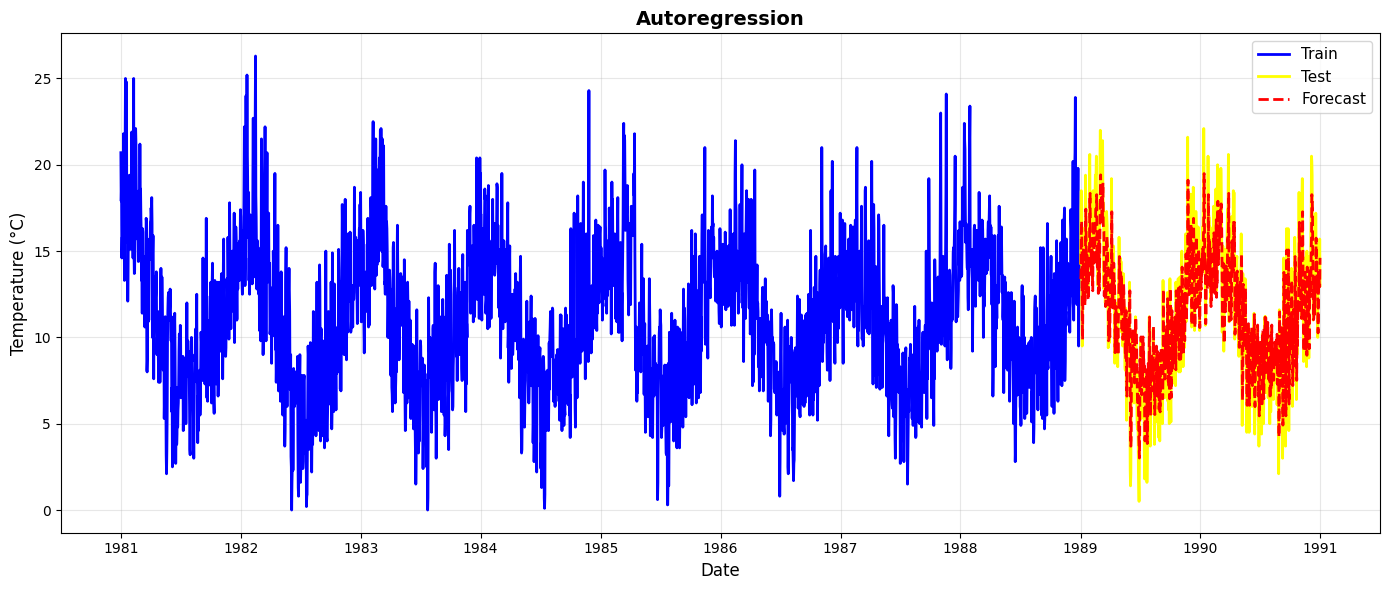


Plot generated successfully!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Load the dataset
print("Loading dataset...")
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url)
print(f"Dataset loaded: {len(df)} records")

# Extract temperature values and convert dates to datetime
temps = df['Temp'].values
dates = pd.to_datetime(df['Date'])

# Parameters
lag = 1  # AR(1) model
train_size = int(len(temps) * 0.8)

# Prepare training data
X_train = []
y_train = []

print("\nPreparing training data...")
for i in tqdm(range(lag, train_size), desc="Building training set"):
    X_train.append(temps[i - lag])
    y_train.append(temps[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Linear regression using normal equation (closed-form solution)
print("\nCalculating model coefficients using normal equation...")
n = len(X_train)
sum_x = np.sum(X_train)
sum_y = np.sum(y_train)
sum_xy = np.sum(X_train * y_train)
sum_x2 = np.sum(X_train ** 2)

# Calculate coefficients
a = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
b = (sum_y - a * sum_x) / n

print("=" * 50)
print("Autoregressive Model (AR(1)) Results")
print("=" * 50)
print(f"\nModel Equation: T(t+1) = {a:.4f} × T(t) + {b:.4f}")
print(f"\nCoefficient (a): {a:.4f}")
print(f"Intercept (b): {b:.4f}")

# Make predictions on test set
predictions = []
actuals = []

print("\nMaking predictions on test set...")
for i in tqdm(range(train_size, len(temps)), desc="Generating predictions"):
    pred = a * temps[i - lag] + b
    predictions.append(pred)
    actuals.append(temps[i])

predictions = np.array(predictions)
actuals = np.array(actuals)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"\nRMSE on Test Set: {rmse:.3f}°C")
print(f"Train/Test Split: {train_size}/{len(predictions)}")
print("=" * 50)

# Plot the results
print("\nGenerating plot...")
plt.figure(figsize=(14, 6))

# Extract train and test dates
train_dates = dates[:train_size]
test_dates = dates[train_size:len(temps)]

# Plot training data
plt.plot(train_dates, temps[:train_size], label='Train', color='blue', linewidth=2)

# Plot test data
plt.plot(test_dates, actuals, label='Test', color='yellow', linewidth=2)

# Plot predictions
plt.plot(test_dates, predictions, label='Forecast', color='red', linewidth=2, linestyle='--')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Autoregression', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nPlot generated successfully!")